In [1]:
import sys
sys.dont_write_bytecode = True

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from lib.utils import imshow
from lib.misc import generate_histogram, otsu
from lib.colors import color_balance, equalize
from lib.kernel import create_gaussian_kernel
from lib.transform import custom_transform, median_transform

import contextlib
with contextlib.redirect_stdout(None):
    np.seterr(divide='ignore', invalid='ignore')

%matplotlib inline

In [2]:
image = cv.imread('./images/Initial & repeat MRI in MS-Free Dataset/AA/1/IM_00037.TIF')
im_gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

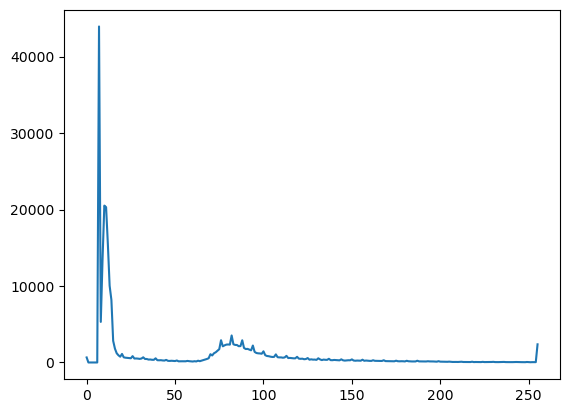

In [3]:
plt.plot(generate_histogram(im_gray))
plt.show()

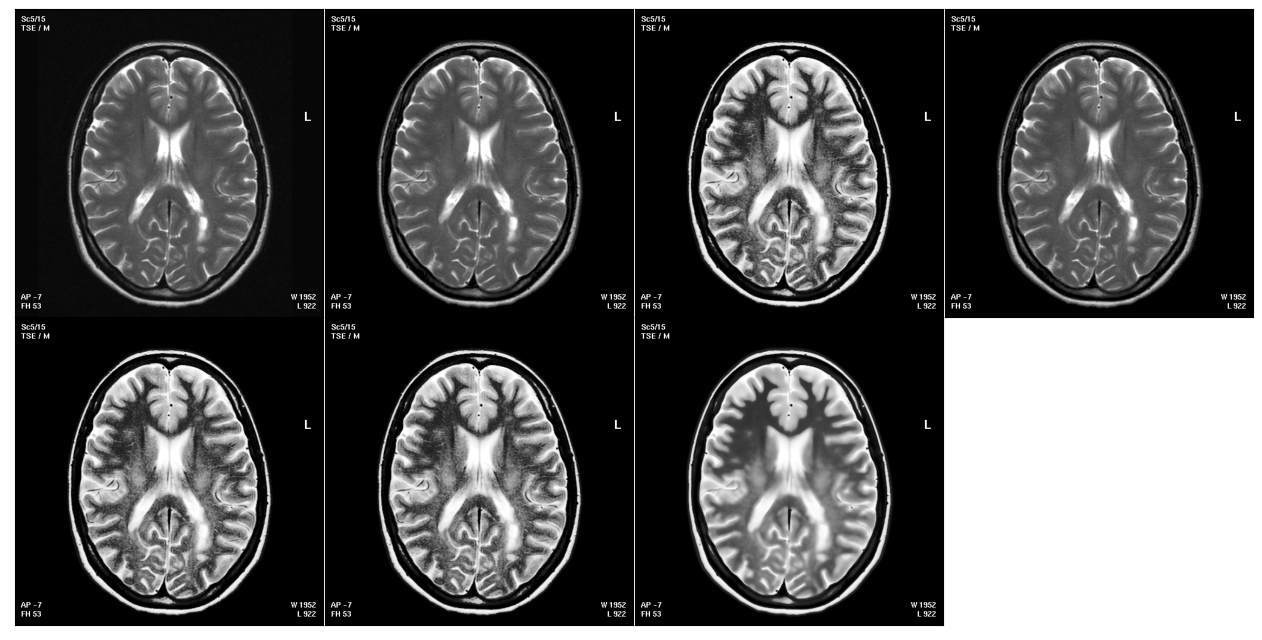

In [6]:
tmp = im_gray.copy()
tmp[tmp <= 20] = 0

imshow(
    im_gray,
    tmp,
    equalize(cv.fastNlMeansDenoising(tmp, None, 1, 7, 21)),
    color_balance(tmp, 0, 255),
    equalize(tmp),
    cv.fastNlMeansDenoising(equalize(tmp), None, 1, 7, 21),
    equalize(cv.fastNlMeansDenoising(tmp, None, h = 11, searchWindowSize = 101)),
    cols = 4
)

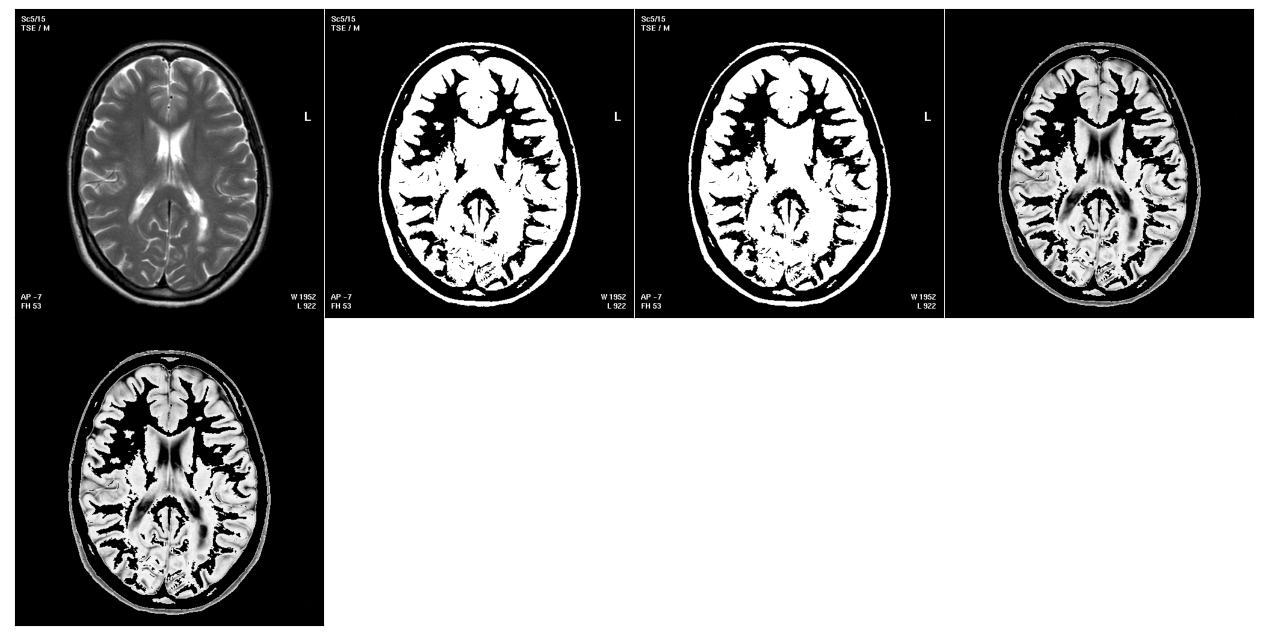

In [5]:
denoised_equalized = equalize(cv.fastNlMeansDenoising(tmp, None, 3, 7, 21))
denoised_equalized2 = cv.fastNlMeansDenoising(equalize(tmp), None, h = 11, searchWindowSize = 101)

thresh, _ = otsu(denoised_equalized)
thresh2, _ = otsu(denoised_equalized2)

denoised_equalized[denoised_equalized > thresh] = 255
denoised_equalized[denoised_equalized <= thresh] = 0
denoised_equalized2[denoised_equalized2 > thresh2] = 255
denoised_equalized2[denoised_equalized2 <= thresh2] = 0

imshow(
    tmp,
    denoised_equalized,
    denoised_equalized2,
    tmp * denoised_equalized2,
    (tmp - 1) * denoised_equalized2,
    cols = 4
)

In [9]:
denoised = cv.fastNlMeansDenoising(tmp, None, h = 11, searchWindowSize = 101)

thresh_denoised, _ = otsu(denoised)

equalized = equalize(tmp, levels = thresh_denoised)

imshow(
    tmp,
    denoised,
    equalized,
    denoised - equalized,
    equalized - denoised,
    equalized + denoised,
    (equalized + denoised) - tmp,
    tmp + equalized,
    cols = 4
)

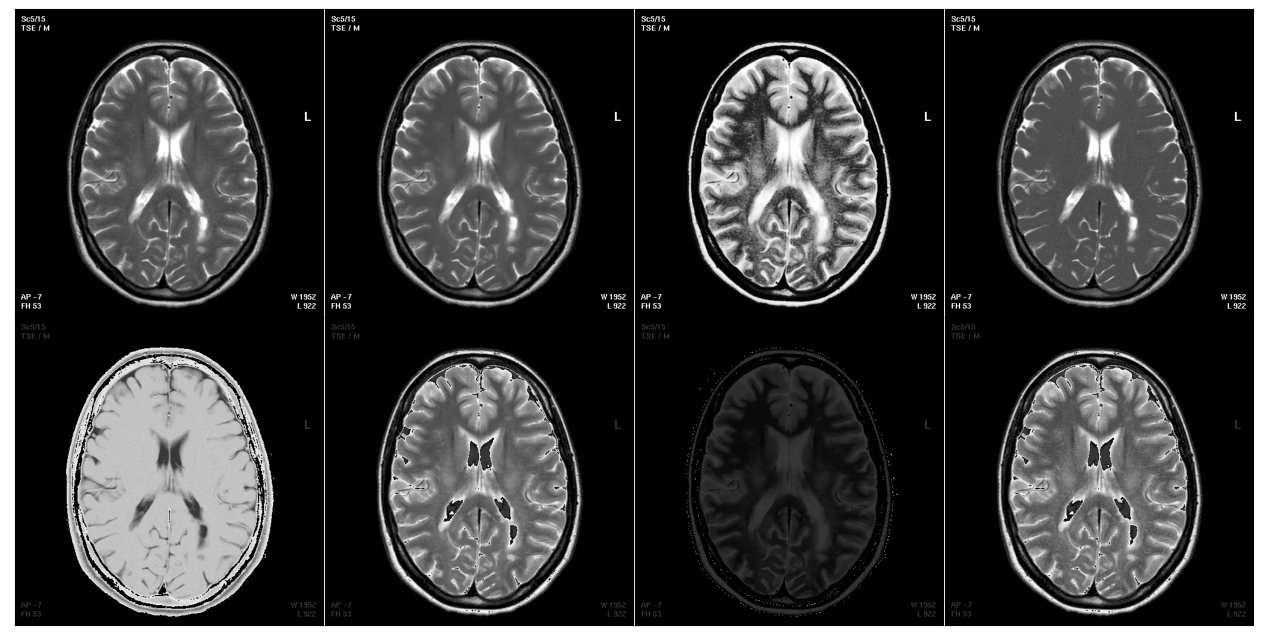

In [61]:
denoised = cv.fastNlMeansDenoising(tmp, None, h = 3, searchWindowSize = 55)

thresh_denoised, _ = otsu(denoised)

equalized = equalize(tmp, levels = thresh_denoised)

imshow(
    tmp,
    denoised,
    equalized,
    denoised - equalized,
    equalized - denoised,
    equalized + denoised,
    (equalized + denoised) - tmp,
    tmp + equalized,
    cols = 4
)